In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
cars_flag = True
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
mappings

{'buying': ['high', 'low', 'med', 'vhigh'],
 'class': ['acc', 'good', 'unacc', 'vgood'],
 'doors': ['2', '3', '4', '5more'],
 'lug_boot': ['big', 'med', 'small'],
 'maint': ['high', 'low', 'med', 'vhigh'],
 'persons': ['2', '4', 'more'],
 'safety': ['high', 'low', 'med']}

In [7]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [8]:
print(X.shape)
print(y.shape)
X.head()

(1728, 6)
(1728,)


,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [9]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [17]:
base_estimator = DecisionTreeClassifier(max_depth=2)

In [18]:
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=25)
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=25, random_state=None)

In [19]:
param_grid = dict(n_estimators=[20,30,40,50])
grid = GridSearchCV(clf, param_grid=param_grid, 
                    scoring=scoring, cv=10, n_jobs=-1)

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=25, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(matthews_corrcoef), verbose=0)

In [21]:
clf = grid.best_estimator_
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.7837724556206745
{'n_estimators': 40}
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=40, random_state=None)


In [22]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring=scoring)
print(scoring)

make_scorer(matthews_corrcoef)


In [23]:
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

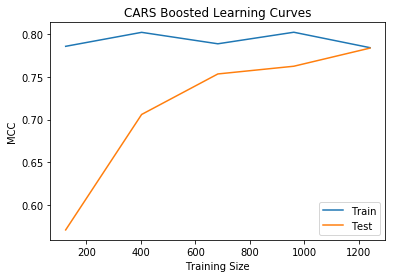

In [25]:
plt.title("CARS Boosted Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MCC")
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.legend(loc='best')

In [26]:
param_range = [20,30,40,50]
train_scores, test_scores = validation_curve(clf, X_train, y_train, 
                                             param_name='n_estimators', 
                                             param_range=param_range,
                                             cv=10,
                                             scoring=scoring)

In [27]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

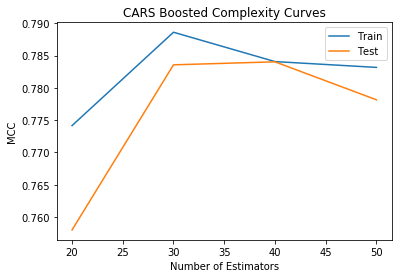

In [28]:
plt.title("CARS Boosted Complexity Curves")
plt.xlabel("Number of Estimators")
plt.ylabel("MCC")
plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Test")
plt.legend(loc='best')

In [29]:
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=40)
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=40, random_state=None)

In [30]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=40, random_state=None)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print metrics.matthews_corrcoef(y_test, y_pred)

0.819923265905434
